In [7]:
# Volatility, Average True Range (ATR), and Risk
# Using volatility as a measurement of risk
# Calculating Average True Range, a measure of volatility and risk
# Visualising the volatility
# Combining risk and return using the Sharpe ratio


import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yfin
yfin.pdr_override()

# To get around a breaking change in the yahoo finance API

ticker = "NVDA"
start = dt.datetime(2019, 1, 1)
data = pdr.get_data_yahoo(ticker, start)


[*********************100%***********************]  1 of 1 completed


In [2]:
# True Range is a function of the maxmimum of the Current High, the Current Low, the Previous Close,
# and the time period employed. The default value is 14 days.

data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,32.660000,34.619999,32.512501,34.055000,33.799728,50875200
2019-01-03,33.447498,33.790001,31.922501,31.997499,31.757652,70555200
2019-01-04,32.735001,34.432499,32.424999,34.047501,33.792290,58562000
2019-01-07,34.625000,36.222500,34.107498,35.849998,35.581264,70916000
2019-01-08,36.672501,36.695000,34.224998,34.957500,34.695457,78601600


In [3]:
# Calculating the Average True Range formula in parts

high_low = data['High'] - data['Low']
high_low

Date
2019-01-02     2.107498
2019-01-03     1.867500
2019-01-04     2.007500
2019-01-07     2.115002
2019-01-08     2.470001
                ...    
2023-04-19     7.679993
2023-04-20    10.299988
2023-04-21     4.609985
2023-04-24     6.950012
2023-04-25    10.220001
Length: 1086, dtype: float64

In [4]:
high_cp = np.abs(data['High'] - data['Close'].shift())
high_cp

Date
2019-01-02         NaN
2019-01-03    0.264999
2019-01-04    2.434999
2019-01-07    2.174999
2019-01-08    0.845001
                ...   
2023-04-19    3.329987
2023-04-20    0.989990
2023-04-21    0.789978
2023-04-24    2.470001
2023-04-25    2.049988
Length: 1086, dtype: float64

In [5]:
low_cp = np.abs(data['Low'] - data['Close'].shift())
low_cp

Date
2019-01-02         NaN
2019-01-03    2.132500
2019-01-04    0.427500
2019-01-07    0.059998
2019-01-08    1.625000
                ...   
2023-04-19    4.350006
2023-04-20    9.309998
2023-04-21    3.820007
2023-04-24    4.480011
2023-04-25    8.170013
Length: 1086, dtype: float64

In [8]:
# Taking the maximum of each of these caluclations, by creating a data frame, df

df = pd.concat([high_low, high_cp, low_cp], axis=1)

In [9]:
df.head()

,0,1,2
Date,,,
2019-01-02,2.107498,NaN,NaN
2019-01-03,1.867500,0.264999,2.132500
2019-01-04,2.007500,2.434999,0.427500
2019-01-07,2.115002,2.174999,0.059998
2019-01-08,2.470001,0.845001,1.625000


In [10]:
true_range = np.max(df, axis=1)
true_range

Date
2019-01-02     2.107498
2019-01-03     2.132500
2019-01-04     2.434999
2019-01-07     2.174999
2019-01-08     2.470001
                ...    
2023-04-19     7.679993
2023-04-20    10.299988
2023-04-21     4.609985
2023-04-24     6.950012
2023-04-25    10.220001
Length: 1086, dtype: float64

In [12]:
average_true_range = true_range.rolling(14).mean()
average_true_range

# This rolling function takes the 14 first values and apply the function onto them

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2023-04-19    7.584281
2023-04-20    7.952138
2023-04-21    7.760707
2023-04-24    7.782850
2023-04-25    8.017851
Length: 1086, dtype: float64

In [13]:
# Visualising the ATR Average True Range

import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


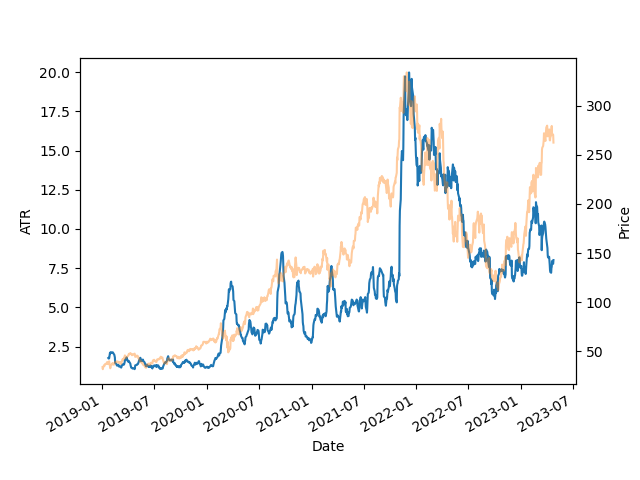

Text(0, 0.5, 'Price')

In [24]:
fig, ax = plt.subplots()
average_true_range.plot(ax=ax)
# If the values are high, they are volatile.

ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.4)
# The blue line, ATR, starts after 14 days
# The yellow line, the Closing Price, starts from the beginngin of the time frame.


ax.set_ylabel("ATR")
ax2.set_ylabel("Price")

# In periods with big changes in price, ATR moves up. When the price is more stable, the ATR moves down.
